In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima
from utils import *
import warnings
warnings.filterwarnings("ignore")

In [68]:
data =  pd.read_csv('/workspaces/Gupir11-machine-learning/data/raw/sales.csv')
data

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [69]:
data["date"] 

0      2022-09-03 17:10:08.079328
1      2022-09-04 17:10:08.079328
2      2022-09-05 17:10:08.079328
3      2022-09-06 17:10:08.079328
4      2022-09-07 17:10:08.079328
                  ...            
361    2023-08-30 17:10:08.079328
362    2023-08-31 17:10:08.079328
363    2023-09-01 17:10:08.079328
364    2023-09-02 17:10:08.079328
365    2023-09-03 17:10:08.079328
Name: date, Length: 366, dtype: object

In [70]:
data["date"] = pd.to_datetime(data["date"]).dt.normalize()
data = data.set_index("date")


In [71]:
ts = data["sales"]
ts.head()

date
2022-09-03    55.292157
2022-09-04    53.803211
2022-09-05    58.141693
2022-09-06    64.530899
2022-09-07    66.013633
Name: sales, dtype: float64

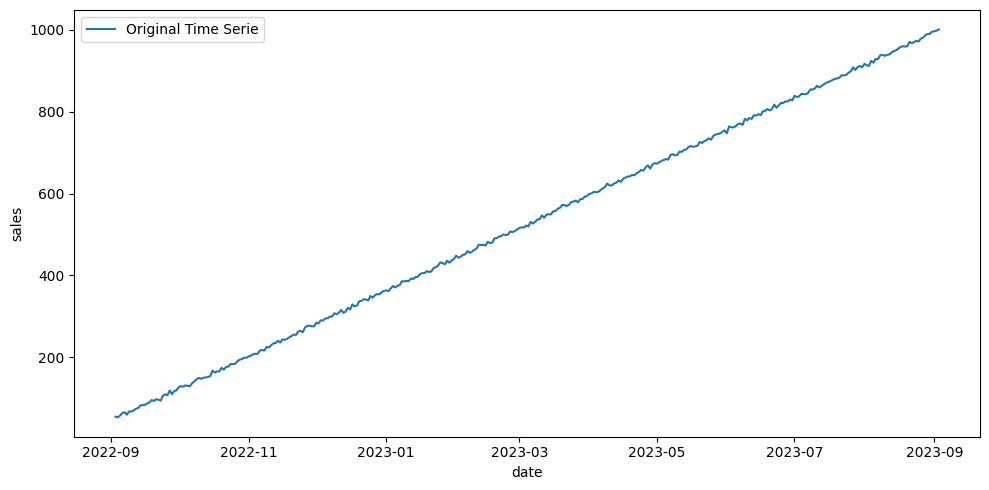

In [72]:
fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(data=ts, label="Original Time Serie")

plt.tight_layout()
plt.show()

In [76]:
decomposition = seasonal_decompose(ts)
decomposition

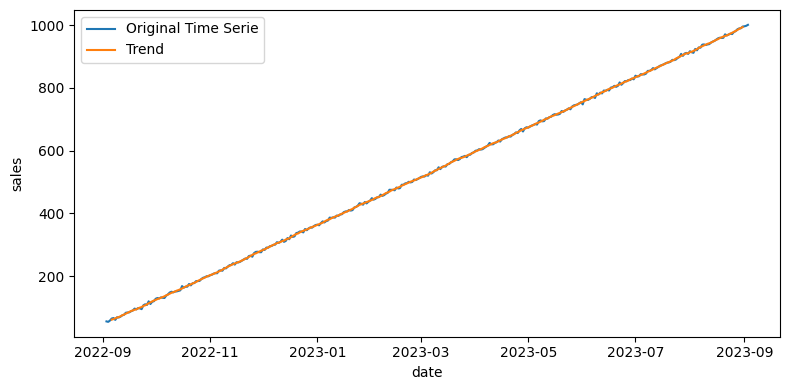

In [77]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize=(8, 4))
sns.lineplot(data=ts, label="Original Time Serie")
sns.lineplot(data=trend, label="Trend")

plt.tight_layout()
plt.show()

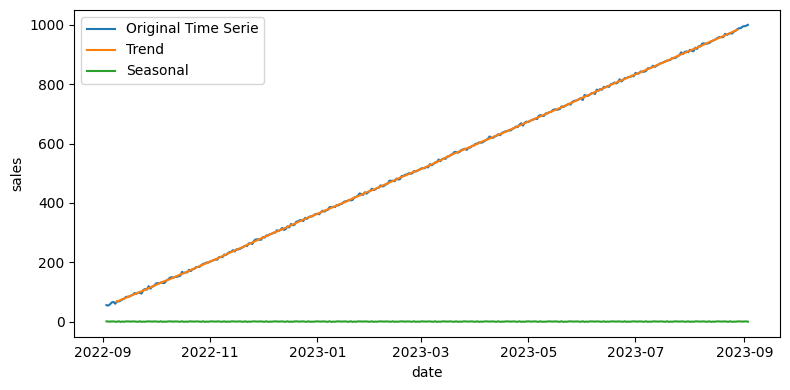

In [75]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize=(8, 4))
sns.lineplot(data=ts, label="Original Time Serie")
sns.lineplot(data=trend, label="Trend")
sns.lineplot(data=seasonal, label="Seasonal")

plt.tight_layout()
plt.show()

In [78]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)


Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64